<a href="https://colab.research.google.com/github/nikhil1234108/data-science/blob/main/SVHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Street View House Number (SVHN) Dataset



In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU, Input
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow_datasets as tfds

In [13]:
(df_train,df_test),df_info=tfds.load('svhn_cropped',split=['train','test'],as_supervised=True,with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.FX9MG3_3.0.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.FX9MG3_3.0.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.FX9MG3_3.0.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.


In [73]:
def convert_to_numpy(dataset):
  images=[]
  labels=[]
  for image,label in dataset:
    images.append(image)
    labels.append(label)
  return np.array(images),np.array(labels)

In [74]:
x_train,y_train=convert_to_numpy(df_train)
x_test,y_test=convert_to_numpy(df_test)

In [75]:
print(f"x_train shape:{x_train.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"x_test shape:{x_test.shape}")
print(f"y_test shape:{y_test.shape}")

x_train shape:(73257, 32, 32, 3)
y_train shape:(73257,)
x_test shape:(26032, 32, 32, 3)
y_test shape:(26032,)


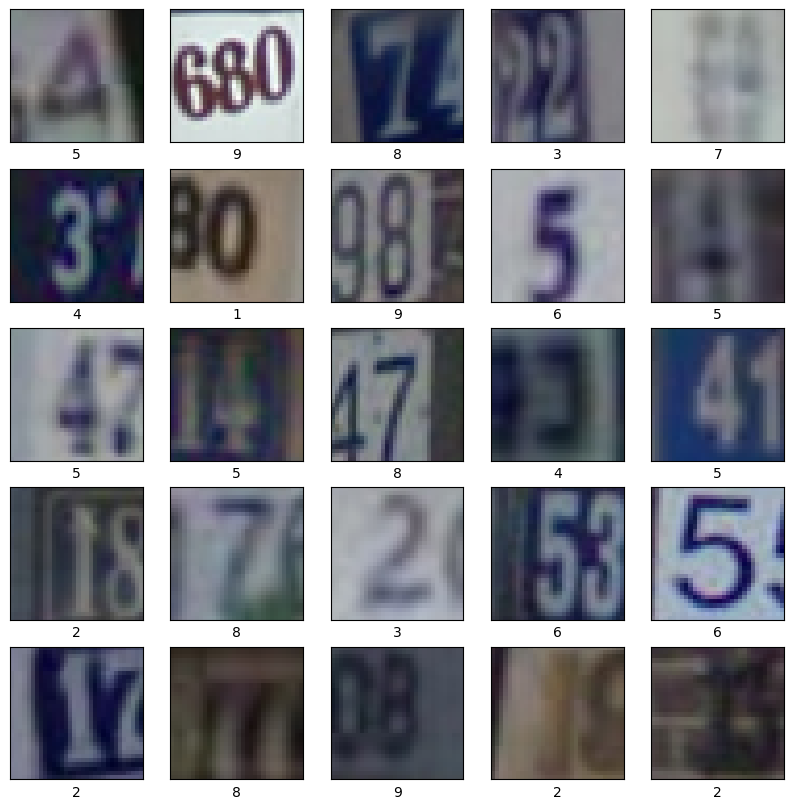

In [76]:
class_numbers=[1,2,3,4,5,6,7,8,9,0]
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_numbers[y_train[i]])

In [33]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255.0
x_test/=255.0
y_train=y_train.flatten()
y_test=y_test.flatten()


In [34]:
k=len(np.unique(y_train))
k

10

In [35]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [37]:
i=Input(shape=x_train[0].shape)
i

<KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=None, name=keras_tensor_1>

In [43]:
from tensorflow.keras.layers import LeakyReLU
x=Conv2D(32,(3,3),padding='same')(i)
x=LeakyReLU()(x)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),padding='same')(x)
x=LeakyReLU()(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Dropout(0.2)(x)

In [44]:
x=Conv2D(32,(3,3),padding='same')(x)
x=LeakyReLU()(x)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),padding='same')(x)
x=LeakyReLU()(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Dropout(0.2)(x)

In [47]:
x=Conv2D(32,(3,3),padding='same')(x)
x=LeakyReLU()(x)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),padding='same')(x)
x=LeakyReLU()(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
x=Flatten()(x)
x=Dropout(0.2)(x)

In [48]:
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)

In [49]:
x=Dense(k,activation='softmax')(x)

In [55]:
network=models.Model(i,x)
network.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 809,514 (3.09 MB)

 Trainable params: 808,874 (3.09 MB)

 Non-trainable params: 640 (2.50 KB)

In [57]:
network.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
a=network.fit(x_train,y_train,batch_size=128,epochs=10,validation_split=0.2,validation_data=(x_test,y_test),verbose=1)
network.save('svhn_model.h5')

Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 405s 707ms/step - accuracy: 0.8864 - loss: 0.3992 - val_accuracy: 0.8749 - val_loss: 0.4257
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 424s 675ms/step - accuracy: 0.8863 - loss: 0.3888 - val_accuracy: 0.7969 - val_loss: 0.6567
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 448s 685ms/step - accuracy: 0.8899 - loss: 0.3722 - val_accuracy: 0.8968 - val_loss: 0.3461
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 409s 715ms/step - accuracy: 0.8934 - loss: 0.3665 - val_accuracy: 0.8582 - val_loss: 0.4718
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 429s 692ms/step - accuracy: 0.8945 - loss: 0.3586 - val_accuracy: 0.8450 - val_loss: 0.5025
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 399s 697ms/step - accuracy: 0.8937 - loss: 0.3627 - val_accuracy: 0.9066 - val_loss: 0.3197
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 395s 689ms/step - accuracy: 0.9001 - loss: 0.3491 - val_accuracy: 0.8732 - val_loss: 0.4359
Epoch 8/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 390s 680ms/step - accuracy: 0.8991 -

In [65]:
batch_size=32
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)
train_generator=data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch=x_train.shape[0]//batch_size
a=network.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=10,validation_data=(x_test,y_test),verbose=1)
network.save('svhn_model.h5')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2289/2289 ━━━━━━━━━━━━━━━━━━━━ 535s 209ms/step - accuracy: 0.6828 - loss: 1.0011 - val_accuracy: 0.7672 - val_loss: 0.7197
Epoch 2/10
   1/2289 ━━━━━━━━━━━━━━━━━━━━ 8:49 232ms/step - accuracy: 0.7188 - loss: 0.9439

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2289/2289 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.7188 - loss: 0.9439 - val_accuracy: 0.7563 - val_loss: 0.7501
Epoch 3/10
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 458s 200ms/step - accuracy: 0.7497 - loss: 0.8053 - val_accuracy: 0.7829 - val_loss: 0.6696
Epoch 4/10
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.7500 - loss: 0.7511 - val_accuracy: 0.7786 - val_loss: 0.6812
Epoch 5/10
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 474s 201ms/step - accuracy: 0.7773 - loss: 0.7203 - val_accuracy: 0.8246 - val_loss: 0.5638
Epoch 6/10
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.8125 - loss: 0.4477 - val_accuracy: 0.8324 - val_loss: 0.5374
Epoch 7/10
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 467s 204ms/step - accuracy: 0.7918 - loss: 0.6806 - val_accuracy: 0.8586 - val_loss: 0.4769
Epoch 8/10
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8438 - loss: 0.6185 - val_accuracy: 0.8489 - val_loss: 0.5111
Epoch 9/10
2289/2289 ━━━━━━━━━━━━━━━━━━━━ 515s 202ms/step - accuracy: 0.7993 - lo

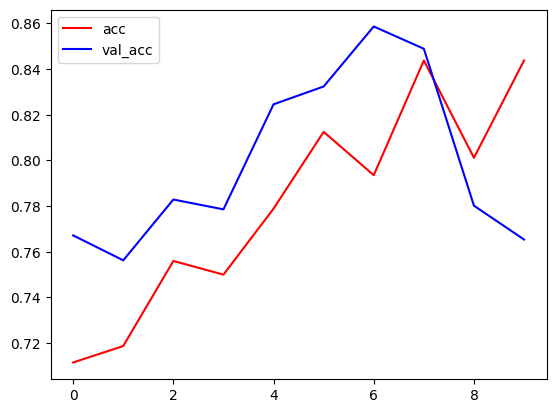

In [66]:
plt.plot(a.history['accuracy'],label='acc',color='red')
plt.plot(a.history['val_accuracy'],label='val_acc',color='blue')
plt.legend()

In [67]:
test_loss,test_accuracy=network.evaluate(x_test,y_test)

814/814 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.7635 - loss: 0.7289


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


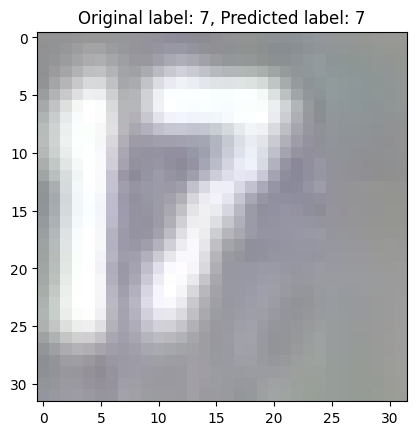

Original label is 7 and predicted label is 7


In [82]:
labels = ['1', '1', '2', '3', '4', '5', '6', '7', '8', '9']
match_found = False
image_number = 0

while not match_found and image_number < len(x_test):
    p = x_test[image_number].reshape(1, 32, 32, 3)

    predicted_label = labels[np.argmax(network.predict(p))]

    original_label = labels[y_test[image_number]]

    if predicted_label == original_label:
        match_found = True
        plt.imshow(x_test[image_number])
        plt.title(f"Original label: {original_label}, Predicted label: {predicted_label}")
        plt.show()
        print(f"Original label is {original_label} and predicted label is {predicted_label}")
    else:
        image_number += 1

if not match_found:
    print("No match found in the dataset.")

In [ ]:
batch_size = 128
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=1.0,
    height_shift_range=1.0,
    hprizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)
train_generator=data_generator.flow(x_train,y_train,batch_size=batch_size)
steps_per_epoch=x_train.shape[0]//batch_size
a=network.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=10,validation_data=(x_test,y_test),verbose=1)